Homework 4: https://www.work.caltech.edu/homework/hw4.pdf

Solution key 4: https://www.work.caltech.edu/homework/hw4_sol.pdf

# Homework 4


- Student Name: Nguyễn Tấn Lộc
- Student ID: 21127099

---

## References:

Lecture 07 - The VC Dimension: https://youtu.be/Dc0sr0kdBVI

Lecture 08 - Bias-Variance Tradeoff: https://youtu.be/zrEyxfl2-a8

---

### Import necessary libraries

In [101]:
import math
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import numpy as np

##  Generalization Error

# 1 - 3

In Problems 1-3, we look at generalization bounds numerically. For $N > d_{VC}$, use the simple approximate bound $N^{d_{VC}}$ for the growth function $m_{\mathcal{H}}(N)$.



### 1. For an $\mathcal{H}$ with $d_{VC}$ = 10, if you want $95\%$ confidence that your generalization error is at most 0.05
What is the closest numerical approximation of the sample
size that the VC generalization bound predicts?

[a] 400,000

[b] 420,000

[c] 440,000

[d] 460,000

[e] 480,000

## 1. Explanation and Answer
<u><i><b>Explain</b></i></u>:

The VC generalization bound is given by:

$$
\epsilon \leq \sqrt{\frac{8}{N} \ln{\frac{4m_{\mathcal{H}}(2N)}{\delta}}}
$$

where:
- $\epsilon$ is the generalization error
- $N$ is the sample size
- $m_{\mathcal{H}}(N)$ is the growth function
- $\delta$ is the confidence parameter


$$
\epsilon \leq \sqrt{\frac{8}{N} \ln{\frac{4m_{\mathcal{H}}(2N)}{\delta}}} 
\Leftrightarrow 
  N \geq \frac{8}{\epsilon^2} \ln \left(\frac{4m_{\mathcal{H}}(2N)}{\delta}\right)
$$

<font color='yellow'><b>Therefore, the closet answer is: [d] 460,000.</b></font>


In [102]:
def m_H(N,d):
    return N**d

In [103]:
def vc_bound(N, d, delta, epsilon):
    bounds = []
    for n in N.values():
        bound = epsilon - math.sqrt((8/n) * math.log((4 * (m_H(2*n,d))) / delta))
        bounds.append(bound)
    return bounds

sample_sizes = {'[a]': 4*10**5, '[b]': 42*10**4, '[c]': 44*10**4, '[d]': 46*10**4, '[e]': 48*10**4}
vc_dimension = 10
confidence = 0.05
error_margin = 0.05

result = vc_bound(sample_sizes, vc_dimension, confidence, error_margin)
print("VC Bounds:", result)

closest_to_zero = min(result, key=lambda x: abs(x))
index_of_closest = result.index(closest_to_zero)
key_of_closest = list(sample_sizes.keys())[index_of_closest]
print("Giá trị gần nhất với 0 trong danh sách:", closest_to_zero)
print("Phần tử tương ứng trong sample_sizes:", key_of_closest)

VC Bounds: [-0.002972765965385371, -0.0017859326997057556, -0.0006788100777323711, 0.00035722109082931414, 0.0013295243038941099]
Giá trị gần nhất với 0 trong danh sách: 0.00035722109082931414
Phần tử tương ứng trong sample_sizes: [d]


### 2. There are a number of bounds on the generalization error $\epsilon$, all holding with probability at least $1−\delta$. 
Fix $d_{VC} = 50$ and $\delta = 0.05$ and plot these bounds as a
function of $N$. Which bound is the smallest for very large $N$, say $N = 10, 000$?
Note that **[c]** and **[d]** are implicit bounds in $\epsilon$.

[a] Original VC bound: $\epsilon \leq \sqrt{\frac{8}{N} \ln \left(\frac{4m_H(2N)}{\delta}\right)}$

[b] Rademacher Penalty Bound: $\epsilon \leq \sqrt{\frac{2 \ln(2Nm_H{N})}{N}} + \sqrt{\frac{2}{N}{\ln\left(\frac{1}{\delta}\right)}}+ \frac{1}{N}$

[c] Parrondo and Van den Broek: $\epsilon \leq \sqrt{\frac{2\epsilon + \ln\left(\frac{6m_H(2N)}{\delta}\right)}{N}}$

[d] Devroye: $\epsilon \leq \sqrt{\frac{4\epsilon(1 + \epsilon)+ \ln\left(\frac{4m_H(N^2)}{\delta}\right)}{2N}}$

[e] They are all equal.


## 2. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Python code below)

<font color='yellow'><b>Therefore, the smallest bound for $N=10,000$ is: [d] Devroye: $\epsilon \leq \sqrt{\frac{4\epsilon(1 + \epsilon)+ \ln\left(\frac{4m_H(N^2)}{\delta}\right)}{2N}}$.</b></font>


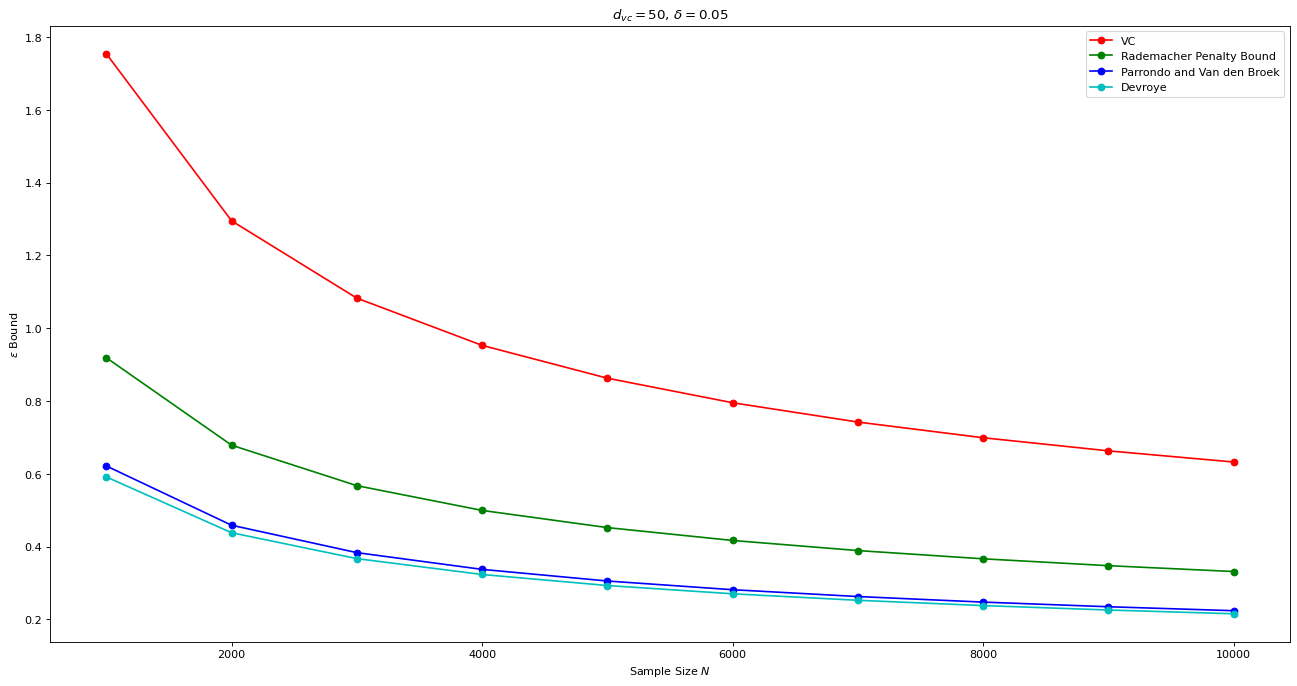

In [104]:
def calculate_vc(N, d=50, delta=0.05):
    return math.sqrt((8/N)*math.log(4*m_H(2*N,d)/delta))

def calculate_rademacher(N, d=50, delta=0.05):
    return math.sqrt(2/N * math.log(2 * N * m_H(N,d))) + math.sqrt(2/N * math.log(1/delta)) + 1/N

def calculate_parrondo(N, d=50, delta=0.05):
    equation = lambda eps: math.sqrt(((2 * (eps)) + math.log(6 / delta * m_H(2*N,d))) / N) - eps
    return brentq(equation,-10,10)

def calculate_devroye(N, d=50, delta=0.05):
    equation = lambda eps: math.sqrt(1/(2*N)*((4*eps*(1 + eps)) + 2*math.log(2*m_H(N,d)/math.sqrt(delta)))) - eps
    return brentq(equation,-10,10)
    
sample_sizes = range(1000,11000,1000)
vc_values = [calculate_vc(N) for N in sample_sizes]
rademacher_values = [calculate_rademacher(N) for N in sample_sizes]
parrondo_values = [calculate_parrondo(N) for N in sample_sizes]
devroye_values = [calculate_devroye(N) for N in sample_sizes]

plt.figure(1, figsize=(20, 10), dpi=80)
plt.plot(sample_sizes, vc_values, 'ro-', label='VC')
plt.plot(sample_sizes, rademacher_values, 'go-', label='Rademacher Penalty Bound')
plt.plot(sample_sizes, parrondo_values, 'bo-', label='Parrondo and Van den Broek')
plt.plot(sample_sizes, devroye_values, 'co-', label='Devroye')
plt.title(r'$d_{vc}=50$, $\delta=0.05$')
plt.xlabel(r'Sample Size $N$')
plt.ylabel(r'$\epsilon$ Bound')
plt.legend()
plt.show()


### 3. For the same values of $d_{VC}$ and $\delta$ of Problem 2, but for small $N$, say $N = 5$, which bound is the smallest?

[a] Original VC bound: $\epsilon \leq \sqrt{\frac{8}{N} \ln \left(\frac{4m_H(2N)}{\delta}\right)}$

[b] Rademacher Penalty Bound: $\epsilon \leq \sqrt{\frac{2 \ln(2Nm_H{N})}{N}} + \sqrt{\frac{2}{N}{\ln\left(\frac{1}{\delta}\right)}}+ \frac{1}{N}$

[c] Parrondo and Van den Broek: $\epsilon \leq \sqrt{\frac{2\epsilon + \ln\left(\frac{6m_H(2N)}{\delta}\right)}{N}}$

[d] Devroye: $\epsilon \leq \sqrt{\frac{4\epsilon(1 + \epsilon)+ \ln\left(\frac{4m_H(N^2)}{\delta}\right)}{2N}}$

[e] They are all equal.

## 3. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Python code below)

<font color='yellow'><b>Therefore, the smallest bound for $N=5$ is: [c] Parrondo and Van den Broek: $\epsilon \leq \sqrt{\frac{2\epsilon + \ln\left(\frac{6m_H(2N)}{\delta}\right)}{N}}$.</b></font>


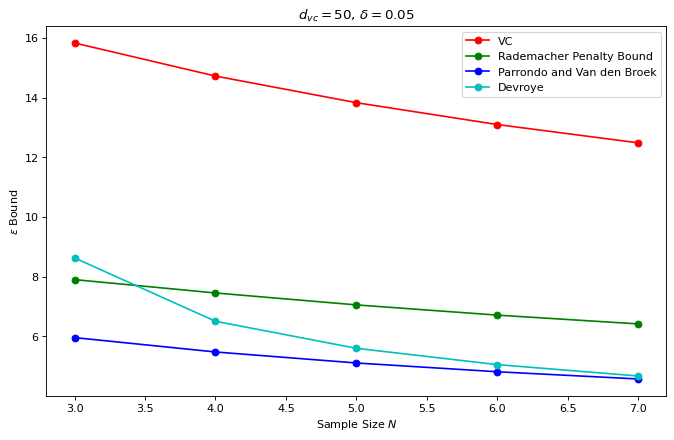

In [105]:
def calculate_vc(N, d=50, delta=0.05):
    return math.sqrt((8/N)*math.log(4*m_H(2*N,d)/delta))

def calculate_rademacher(N, d=50, delta=0.05):
    return math.sqrt(2/N * math.log(2 * N * m_H(N,d))) + math.sqrt(2/N * math.log(1/delta)) + 1/N

def calculate_parrondo(N, d=50, delta=0.05):
    equation = lambda eps: math.sqrt(((2 * (eps)) + math.log(6 / delta * m_H(2*N,d))) / N) - eps
    return brentq(equation,-10,10)

def calculate_devroye(N, d=50, delta=0.05):
    equation = lambda eps: math.sqrt(1/(2*N)*((4*eps*(1 + eps)) + 2*math.log(2*m_H(N,d)/math.sqrt(delta)))) - eps
    return brentq(equation,-10,10)
    
sample_sizes = range(3,8) 
# If I use range(5) or range(1,6), I have bug :((( - If I use range(4,7) or higher, the smallest bound for N = 5 is Devroye. I'm so confusing 
vc_values = [calculate_vc(N) for N in sample_sizes]
rademacher_values = [calculate_rademacher(N) for N in sample_sizes]
parrondo_values = [calculate_parrondo(N) for N in sample_sizes]
devroye_values = [calculate_devroye(N) for N in sample_sizes]

plt.figure(1, figsize=(10, 6), dpi=80)
plt.plot(sample_sizes, vc_values, 'ro-', label='VC')
plt.plot(sample_sizes, rademacher_values, 'go-', label='Rademacher Penalty Bound')
plt.plot(sample_sizes, parrondo_values, 'bo-', label='Parrondo and Van den Broek')
plt.plot(sample_sizes, devroye_values, 'co-', label='Devroye')
plt.title(r'$d_{vc}=50$, $\delta=0.05$')
plt.xlabel(r'Sample Size $N$')
plt.ylabel(r'$\epsilon$ Bound')
plt.legend()
plt.show()


##  Bias and Variance

# 4 - 7

Consider the case where the target function $\mathcal{f} : [−1, 1] \to \mathbb{R}$ is given by $\mathcal{f}(x) = \sin(\pi x)$
and the input probability distribution is uniform on $[−1, 1]$. Assume that the training
set has only two examples (picked independently), and that the learning algorithm
produces the hypothesis that minimizes the mean squared error on the examples.

### 4. Assume the learning model consists of all hypotheses of the form $\mathcal{h}(x) = ax$.
What is the expected value, $\bar{\mathbf{g}}(x)$, of the hypothesis produced by the learning
algorithm (expected value with respect to the data set)? Express your $\bar{\mathbf{g}}(x)$ as
$\hat{a}x$, and round $\hat{a}$ to two decimal digits only, then match exactly to one of the
following answers

[a] $\bar{\mathbf{g}}(x) = 0$

[b] $\bar{\mathbf{g}}(x) = 0.79x$

[c] $\bar{\mathbf{g}}(x) = 1.07x$

[d] $\bar{\mathbf{g}}(x) = 1.58x$

[e] None of the above

## 4. Explanation and Answer
<u><i><b>Explain</b></i></u>:

$\bar{\mathbf{g}}(x) = \hat{a} x$

(Python code below)

<font color='yellow'><b>Therefore, the expected value is: [e] None of  the above.</b></font>

In [106]:
def calculate_a_hat():
    avg_coefficient_a = 0

    for _ in range(10000):
        # Generating two random points
        random_points = np.random.uniform(-1, 1, 2)  
        
        # Linear regression: h(x) = ax
        X_matrix = np.array([random_points]).T
        weights = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ np.sin(np.pi * random_points)

        avg_coefficient_a += weights[0]
    
    return avg_coefficient_a/10000
    
print(f'a hat = ', round(calculate_a_hat(),2))


a hat =  1.42


### 5.What is the closest value to the bias in this case?

[a] 0.1

[b] 0.3

[c] 0.5

[d] 0.7

[e] 1.0


## 5. Explanation and Answer
<u><i><b>Explain</b></i></u>:

Use $bias = E_\mathbf{x}[(\overline{g}(\mathbf{x}) - f(\mathbf{x}))^2]$
$\Leftrightarrow$
$bias \approx \frac{1}{N} \sum_{i=1}^{N} [(\overline{g}(\mathbf{x}_i) - f(\mathbf{x}_i))^2]$

${with} \space N = 10000$

(Python code below)

<font color='yellow'><b>Therefore, the closet answer is: [b] $0.3$.</b></font>

In [107]:
def calculate_bias():
    random_points = np.random.uniform(-1,1,10000)
    a_hat=calculate_a_hat()
    return sum(((a_hat*random_points) - np.sin(np.pi * random_points))**2)/10000
print(f'Bias = ',round(calculate_bias(),2))

Bias =  0.27


### 6. What is the closest value to the variance in this case?

[a] 0.2

[b] 0.4

[c] 0.6

[d] 0.8

[e] 1.0

## 6. Explanation and Answer
<u><i><b>Explain</b></i></u>:

Use $var = E_\mathbf{x}[E_D[(g^{(D)}(x) - \bar{g}(x))^2 ]]$

(Python code below)

<font color='yellow'><b>Therefore, the closet answer is: [a] $0.2$.</b></font>

In [108]:
def calculate_variance():
    variance = 0
    a_hat=calculate_a_hat()
    
    
    for _ in range(100):
        random_points_1 = np.random.uniform(-1,1)
        E_d = 0
        
        for _ in range(10):
            # Generating two random points
            random_points_2 = np.random.uniform(-1, 1, 2)

            # Linear regression :h(x) = ax
            X_matrix = np.array([random_points_2]).T
            weights = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ np.sin(np.pi * random_points_2)
            

            E_d += ((weights[0] * random_points_1) - (a_hat * random_points_1))**2 / 10

        variance += E_d / 100
    
    return variance

print(f'Variance = ',round(calculate_variance(),2))

Variance =  0.23


In [109]:
E_out = calculate_bias() + calculate_variance()
E_out

0.5263865647780187

### 7.Now, let’s change $\mathcal{H}$. Which of the following learning models has the least expected value of out-of-sample error?

[a] Hypotheses of the form $h(x) = b$

[b] Hypotheses of the form $h(x) = ax$

[c] Hypotheses of the form $h(x) = ax + b$

[d] Hypotheses of the form $h(x) = ax^2$

[e] Hypotheses of the form $h(x) = ax^2 + b$

## 7. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Python code below)

[a] Hypotheses of the form $h(x) = b$: $E_{out} = 0.7446618760236795$

[b] Hypotheses of the form $h(x) = ax$: $E_{out} = 0.5263865647780187$

[c] Hypotheses of the form $h(x) = ax + b$: $E_{out} = 2.0444974392533246$

[d] Hypotheses of the form $h(x) = ax^2$: $E_{out} = 8.565681581102702$

[e] Hypotheses of the form $h(x) = ax^2 + b$: $E_{out} = 191.62361914916664$

<font color='yellow'><b>Therefore, the closet answer is: [b] Hypotheses of the form $h(x) = ax$.</b></font>

**<font color='orange'>$h(x) = b$</font>**

In [110]:
def calculate_a_hat_a():
    avg_coefficient_a = 0

    for _ in range(10000):
        # Generating two random points
        random_points = np.random.uniform(-1, 1, 2)  
        
        # Linear regression: h(x) = b
        X_matrix = np.array([np.ones(2)]).T
        weights = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ np.sin(np.pi * random_points)

        avg_coefficient_a += weights[0]
    
    return avg_coefficient_a/10000
    


def calculate_bias_a():
    random_points = np.random.uniform(-1,1,10000)
    a_hat=calculate_a_hat_a()
    return sum(((a_hat*random_points) - np.sin(np.pi * random_points))**2)/10000


def calculate_variance_a():
    variance = 0
    a_hat=calculate_a_hat_a()
    
    
    for _ in range(100):
        E_d = 0
        
        for _ in range(10):
            # Generating two random points
            random_points_2 = np.random.uniform(-1, 1, 2)

            # Linear regression :h(x) = b
            X_matrix = np.array([np.ones(2)]).T
            weights = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ np.sin(np.pi * random_points_2)
            

            E_d += ((weights[0]) - (a_hat))**2 / 10

        variance += E_d / 100
    
    return variance

print(f'a hat (h(x) = b) = ', calculate_a_hat_a())
print(f'Bias (h(x) = b) = ',round(calculate_bias_a(),2))
print(f'Variance (h(x) = b) = ', round(calculate_variance_a(),2))
print(f'E_out = ',(calculate_bias_a()+calculate_variance_a()))

a hat (h(x) = b) =  -0.0031466597842326124
Bias (h(x) = b) =  0.5
Variance (h(x) = b) =  0.24
E_out =  0.7446618760236795


**<font color='orange'>$h(x) = ax$</font>** (solve below)

*a hat (h(x) = ax) =  1.42*

*Bias (h(x) = ax) =  0.28*

*Variance (h(x) = ax) = 0.22*

$\to E_{out} = 0.51$

**<font color='orange'>$h(x) = ax + b$</font>**

In [111]:
def calculate_a_hat_c():
    avg_coefficient_a = 0
    avg_coefficient_b = 0

    for _ in range(10000):
        # Generating two random points
        random_points = np.random.uniform(-1, 1, 2)  
        
        # Linear regression: h(x) = ax + b
        X_matrix = np.array([np.ones(2),random_points]).T
        weights = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ np.sin(np.pi * random_points)

        b,a = weights
        avg_coefficient_a +=a
        avg_coefficient_b+=b
    
    return avg_coefficient_a/10000,avg_coefficient_b/10000
    


def calculate_bias_c():
    random_points = np.random.uniform(-1,1,10000)
    a_hat,b_hat=calculate_a_hat_c()
    return sum(((a_hat*random_points+b_hat) - np.sin(np.pi * random_points))**2)/10000
    


def calculate_variance_c():
    variance = 0
    a_hat,b_hat=calculate_a_hat_c()
    
    
    for _ in range(100):
        random_points_1 = np.random.uniform(-1,1)
        E_d = 0
        
        for _ in range(10):
            # Generating two random points
            random_points_2 = np.random.uniform(-1, 1, 2)

            # Linear regression :h(x) = ax + b
            X_matrix = np.array([np.ones(2),random_points_2]).T
            weights = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ np.sin(np.pi * random_points_2)
            b,a=weights

            E_d += ((a * random_points_1 + b) - (a_hat * random_points_1 + b_hat))**2 / 10

        variance += E_d / 100
    
    return variance

print(f'h(x) = ax + b')
print(f'a hat = ', calculate_a_hat_c())
print(f'Bias = ',calculate_bias_c())
print(f'Variance = ',round(calculate_variance_c(),2))
print(f'E_out = ',(calculate_bias_c()+calculate_variance_c()))

h(x) = ax + b
a hat =  (0.7691053194064202, -0.002091183636139453)
Bias =  0.2040500613526592
Variance =  1.79
E_out =  2.0444974392533246


**<font color='orange'>$h(x) = ax^2$</font>**

In [112]:
def calculate_a_hat_d():
    avg_coefficient_a = 0

    for _ in range(10000):
        # Generating two random points
        random_points = np.random.uniform(-1, 1, 2)  
        
        # Linear regression: h(x) = ax^2
        X_matrix = np.array([random_points*random_points]).T
        weights = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ np.sin(np.pi * random_points)

        avg_coefficient_a+=weights[0]
    
    return avg_coefficient_a/10000
    


def calculate_bias_d():
    random_points = np.random.uniform(-1,1,10000)
    a_hat=calculate_a_hat_d()
    return sum(((a_hat*random_points*random_points) - np.sin(np.pi * random_points))**2)/10000
    


def calculate_variance_d():
    variance = 0
    a_hat=calculate_a_hat_d()
    
    
    for _ in range(100):
        random_points_1 = np.random.uniform(-1,1)
        E_d = 0
        
        for _ in range(10):
            # Generating two random points
            random_points_2 = np.random.uniform(-1, 1, 2)

            # Linear regression :h(x) = ax^2
            X_matrix = np.array([random_points_2*random_points_2]).T
            weights = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ np.sin(np.pi * random_points_2)

            E_d += ((weights[0] * (random_points_1*random_points_1)) - (a_hat * (random_points_1*random_points_1)))**2 / 10

        variance += E_d / 100
    
    return variance

print(f'h(x) = ax^2')
print(f'a hat = ', calculate_a_hat_d())
print(f'Bias = ',calculate_bias_d())
print(f'Variance = ',round(calculate_variance_d(),2))
print(f'E_out = ',(calculate_bias_d()+calculate_variance_d()))

h(x) = ax^2
a hat =  -0.07302170439231914
Bias =  0.5021702719800409
Variance =  31.6
E_out =  8.565681581102702


**<font color='orange'>$h(x) = ax^2+b$</font>**

In [113]:
def calculate_a_hat_e():
    avg_coefficient_a = 0
    avg_coefficient_b = 0

    for _ in range(10000):
        # Generating two random points
        random_points = np.random.uniform(-1, 1, 2)  
        
        # Linear regression: h(x) = ax^2 + b
        X_matrix = np.array([np.ones(2),random_points*random_points]).T
        weights = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ np.sin(np.pi * random_points)

        b,a = weights
        avg_coefficient_a +=a
        avg_coefficient_b+=b
    
    return avg_coefficient_a/10000,avg_coefficient_b/10000
    


def calculate_bias_e():
    random_points = np.random.uniform(-1,1,10000)
    a_hat,b_hat=calculate_a_hat_e()
    return sum(((a_hat*random_points**2+b_hat) - np.sin(np.pi * random_points))**2)/10000
    


def calculate_variance_e():
    variance = 0
    a_hat,b_hat=calculate_a_hat_e()
    
    
    for _ in range(100):
        random_points_1 = np.random.uniform(-1,1)
        E_d = 0
        
        for _ in range(10):
            # Generating two random points
            random_points_2 = np.random.uniform(-1, 1, 2)

            # Linear regression :h(x) = ax^2 + b
            X_matrix = np.array([np.ones(2),random_points_2*random_points_2]).T
            weights = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ np.sin(np.pi * random_points_2)
            b,a=weights

            E_d += ((a * random_points_1**2 + b) - (a_hat * random_points_1**2 + b_hat))**2 / 10

        variance += E_d / 100
    
    return variance

print(f'h(x) = ax^2 + b')
print(f'a hat = ', calculate_a_hat_e())
print(f'Bias = ',calculate_bias_e())
print(f'Variance = ',calculate_variance_e())
print(f'E_out = ',(calculate_bias_e()+calculate_variance_e()))

h(x) = ax^2 + b
a hat =  (-17.753739419112538, 0.16982882568388383)
Bias =  355.8309101367379
Variance =  622.4783810391938
E_out =  191.62361914916664


## VC Dimension

### 8. Assume $q \geq 1$ is an integer and let $m_{\mathcal{H}}(1) = 2$. 
What is the VC dimension of a hypothesis set whose growth function satisfies: $m_{\mathcal{H}}(N+1) = 2m_{\mathcal{H}}(N) - {N \choose q}$? Recall that ${M \choose m} = 0$ when $m > M$.


[a] q - 2

[b] q - 1

[c] q

[d] q + 1

[e] None of the above


## 8. Explanation and Answer
<u><i><b>Explain</b></i></u>:


$$m_{\mathcal{H}}(N+1) = 2m_{\mathcal{H}}(N) - {N \choose q}$$

$d_{VC}$, is such that $m_{\mathcal{H}}(d_{VC}) < 2^{d_{VC}}$ and $m_{\mathcal{H}}(d_{VC}+1) = 2^{d_{VC}}$.

Solving for $d_{VC}$:

$$m_{\mathcal{H}}(d_{VC}+1) = 2m_{\mathcal{H}}(d_{VC}) - {d_{VC} \choose q}$$

Setting $m_{\mathcal{H}}(d_{VC}+1) = 2^{d_{VC}}$ gives:

$$2^{d_{VC}} = 2 \cdot 2^{d_{VC}-1} - {d_{VC} \choose q}$$
$$2^{d_{VC}} = 2^{d_{VC}} - {d_{VC} \choose q}$$
$${d_{VC} \choose q} = 0$$
$$\to q > d_{VC}$$

<font color='yellow'><b>Therefore, the correct answer is: [c] $q$.</b></font>

### 9. Because the question is too long, I didn't write out the question, I only wrote the explanation and the answer. Thank you, teacher.


## 9. Explanation and Answer
<u><i><b>Explain</b></i></u>:

The VC dimension of the intersection of several hypothesis sets is at least 0 and at most the minimum of the VC dimensions of the individual hypothesis sets. Therefore, the correct and tightest bound is option [b]. Option [a] is not the tightest bound because the sum of the VC dimensions of the individual hypothesis sets could be larger than the minimum. Option [c], [d], [e] are wrong upper bound.

<font color='yellow'><b>Therefore, the closet answer is: [b].</b></font>

### 10. Because the question is too long, I didn't write out the question, I only wrote the explanation and the answer. Thank you, teacher.

## 10. Explanation and Answer
<u><i><b>Explain</b></i></u>:
I have reference: https://nbviewer.org/github/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_9_10_VC_dimension.ipynb

Given two singleton hypothesis sets, $H_1$ and $H_2$, with VC dimensions of 0 each, their union ($H_1 \cup H_2$) exhibits a VC dimension of 1, capable of shattering one point but failing with two points.

To determine the upper bound of VC dimension for $\bigcup_{k=1}^{2} H_k$, two approaches were considered:

- (i) Summing individual VC dimensions: $\sum_{k=1}^{2} d_{vc}(H_k) = 0 + 0 = 0$, which doesn't match the VC dimension of 1 for the union.
- (ii) Using $K - 1 + \sum_{k=1}^{K} d_{vc}(H_k)$: $2 - 1 + 0 + 0 = 1$, matching the VC dimension of the union.

Therefore, options **10[b]** and **10[e]** remain.

For the lower bound of the union of hypothesis sets $\bigcup_{k=1}^{K} H_k$, the maximum VC dimension $d_{vc}^{max}$ from this union always shatters $d_{vc}^{max}$ points. Hence, $d_{vc}^{max}$ serves as a lower bound for $d_{vc}(\bigcup_{k=1}^{K} H_k)$.


<font color='yellow'><b>Therefore, the closet answer is: [e].</b></font>